<a href="https://colab.research.google.com/github/nicole-yoong/Portfolio/blob/main/Fetal_Health_Detection_Modelling/Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questions

Context
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

Data
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

fetal_health : Fetal health: 1 - Normal 2 - Suspect 3 - Pathological

# Variables explaination

baseline value : Baseline Fetal Heart Rate (FHR)

accelerations : Number of accelerations per second

fetal_movement : Number of fetal movements per second

uterine_contractions : Number of uterine contractions per second

light_decelerations : Number of LDs per second

severe_decelerations : Number of SDs per second

prolongued_decelerations : Number of PDs per second

abnormal_short_term_variability : Percentage of time with abnormal short term variability

mean_value_of_short_term_variability : Mean value of short term variability

percentage_of_time_with_abnormal_long_term_variability : Percentage of time with abnormal long term variability

mean_value_of_long_term_variability : Mean value of long term variability

histogram_width: Width of the histogram made using all values from a record

histogram_min : Histogram minimum value

histogram_max: Histogram maximum value

histogram_number_of_peaks : Number of peaks in the exam histogram

histogram_number_of_zeroes : Number of zeroes in the exam histogram

histogram_mode : Hist mode

histogram_mean : Hist mean

histogram_median : Hist Median

histogram_variance : Hist variance

histogram_tendency : Histogram trend

fetal_health : Fetal health: 1 - Normal 2 - Suspect 3 - Pathological

# Import packages

In [ ]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

print("Setup complete.")

Setup complete.


# Loading data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python/Datasets/fetal_health.csv')
df.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# Data exploration

Download the dataset and prepare a summary of the features available on the 
dataset including data type (numerical/ categorical), amount of missing data in 
individual fields. This can be included as an appendix.


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

(2126, 22)

# Visualization

## Distribution of fetal health

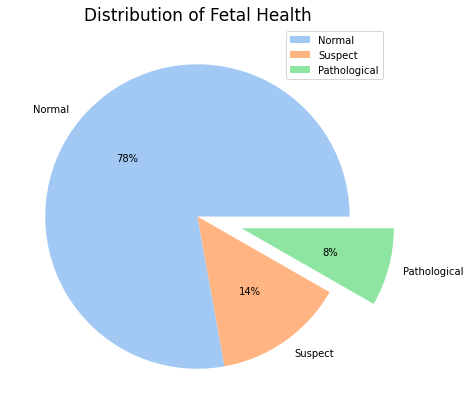

In [ ]:
X = df['fetal_health'].value_counts()
labels = ['Normal','Suspect', 'Pathological']
plt.get_cmap('hsv')
plt.figure(figsize = (14,7))
plt.title('Distribution of Fetal Health', fontsize = 17)
colors = sns.color_palette('pastel')[0:5]
plt.pie(X, labels = labels, autopct='%.0f%%', colors = colors, explode=[0,0,.3])
plt.legend()
plt.show()

From the pie chart, we can observe a class imbalance that might result in the bias to the majority class. Upsampling will be performed in the next section. Let’s now continue with the visualization. 

## Correlation matrix

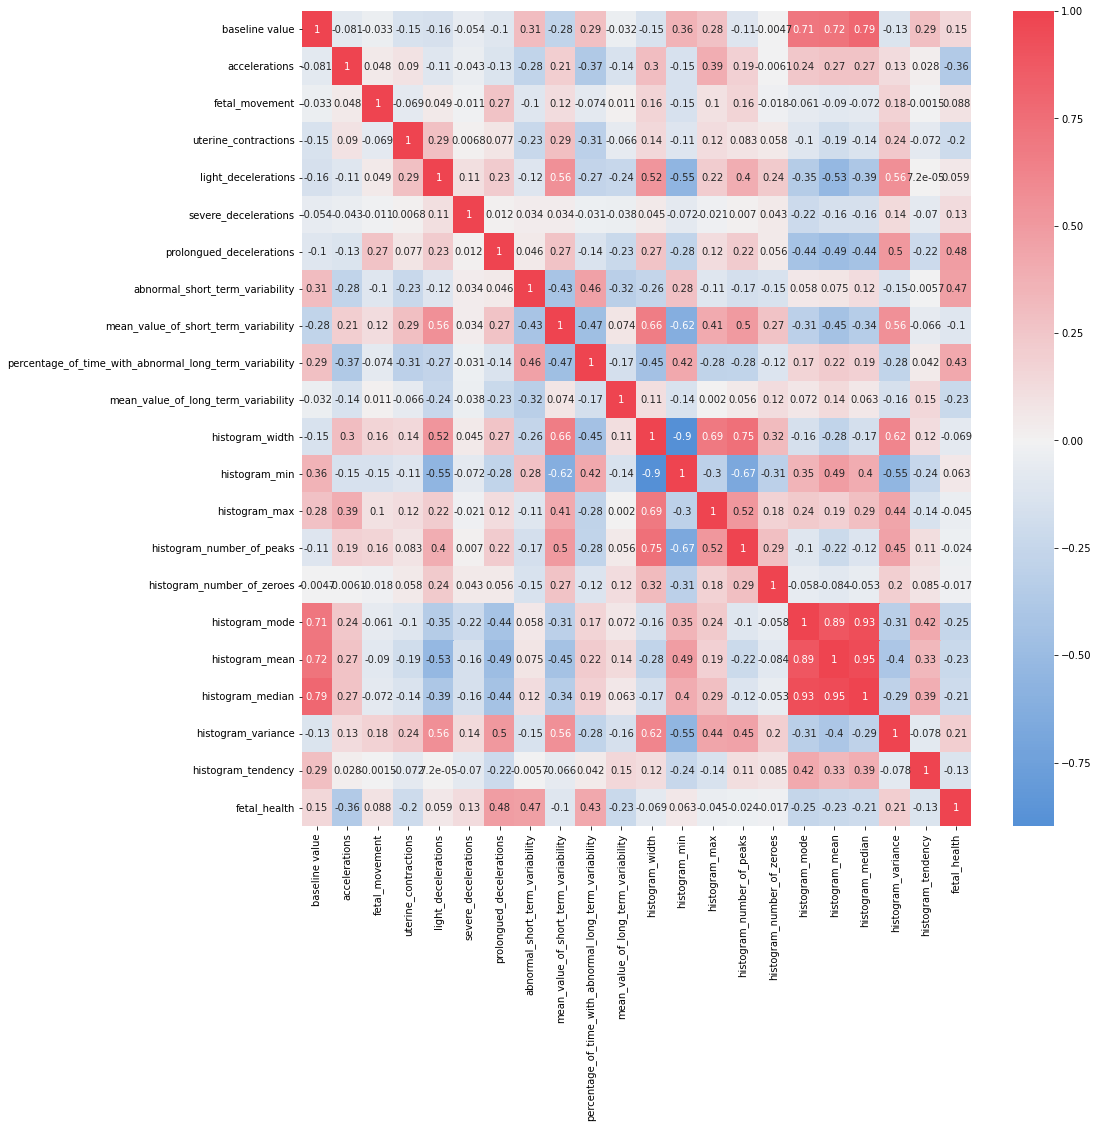

In [ ]:
corrmat= df.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

The correlation heatmap shows that accelerations, prolongued_decelerations, abnormal_short_term_variability, percentage_of_time_with_abnormal_long_term_variability present higher correlation with the fetal health. 

## Accelerations Vs Fetal Movement by Fetal Health

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


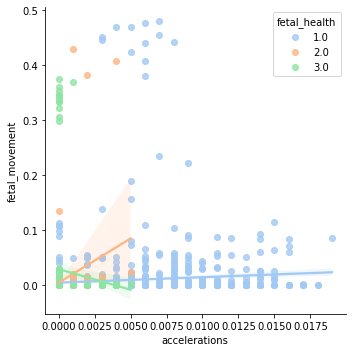

In [ ]:
sns.lmplot(data =df,x="accelerations",y="fetal_movement",palette=colors, hue="fetal_health",legend_out=False)
plt.show()


Fetal heart tracing allows your doctor to measure the rate and rhythm of your little one’s heartbeat. The average rate ranges from 110 to 160 beats per minute (bpm), with a variation of 5 to 25 bpm. Accelerations represent a sudden increase in FHR of more than 15 bpm in bandwidth amplitude.

Fetuses with suspect health condition show an faster fetal movement per second compared to the normal one. While pathological fetuses shows a deccelerating speed when their movements increase. 

## Prolongued Decelerations Vs Fetal Movement by Fetal Health

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


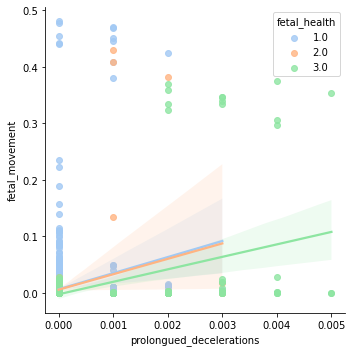

In [ ]:
sns.lmplot(data =df,x="prolongued_decelerations",y="fetal_movement",palette=colors, hue="fetal_health",legend_out=False)
plt.show()

The prolongued decelerations graph confirms the observation in the previous graph, showing that the pathological fetuses demonstate decelerating movements. 

## Abnormal Short Term Variability Vs Fetal Movement by Fetal Health

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


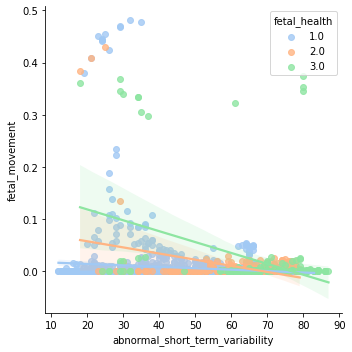

In [ ]:
sns.lmplot(data =df,x="abnormal_short_term_variability",y="fetal_movement",palette=colors, hue="fetal_health",legend_out=False)
plt.show()

Fetal Heart Rate Variability Heart rate variability is the amount in beats per minute (bpm) that the heart rate varies in a given period of time. Percentage of time with abnormal short term variability measures how much time does abnormal heartbeats occur.From the graph we can observe that the fetuses with worse health condition show a higher percentage of time with abnormal short term variability. 

# Feature selection

Apart from the correlation, we can use SelectKBest to select the best feature according to the k highest score. The result presents differences from the correlation. 

In [ ]:
#look at all our numeric columns now present in X
obj_df = df.select_dtypes(exclude=['object']).copy()
FS_Cols=obj_df.columns
FS_Cols

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [ ]:
X1=df[FS_Cols]
y=df.fetal_health

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# configure to select all features
selector = SelectKBest(score_func=mutual_info_classif, k='all')

# transform train input data
Xfs = selector.fit_transform(X1,y)

In [ ]:
#Retrieve the column names for the selected columns
names = X1.columns.values[selector.get_support()]
#and their scores
scores = selector.scores_[selector.get_support()]
#pair the values together with the zip function
names_scores = list(zip(names, scores))
#Store the information in a data frame
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'Mutual_info'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['Mutual_info', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

                                           Feat_names  Mutual_info
21                                       fetal_health     0.675973
8                mean_value_of_short_term_variability     0.205047
9   percentage_of_time_with_abnormal_long_term_var...     0.186345
7                     abnormal_short_term_variability     0.181287
17                                     histogram_mean     0.161757
16                                     histogram_mode     0.151936
18                                   histogram_median     0.145276
19                                 histogram_variance     0.138757
11                                    histogram_width     0.135059
1                                       accelerations     0.134383
12                                      histogram_min     0.133659
0                                      baseline value     0.121746
6                            prolongued_decelerations     0.078106
10                mean_value_of_long_term_variability     0.07

### Remove highly correlated columns

By computing the correlation matrix, we can obtain a correlation score that allows us to remove the highly correlated variable. In our case, we will remove any variable with the score over 0.90. 

In [ ]:
cor_matrix = X1.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                                                    baseline value  \
baseline value                                                 NaN   
accelerations                                                  NaN   
fetal_movement                                                 NaN   
uterine_contractions                                           NaN   
light_decelerations                                            NaN   
severe_decelerations                                           NaN   
prolongued_decelerations                                       NaN   
abnormal_short_term_variability                                NaN   
mean_value_of_short_term_variability                           NaN   
percentage_of_time_with_abnormal_long_term_vari...             NaN   
mean_value_of_long_term_variability                            NaN   
histogram_width                                                NaN   
histogram_min                                                  NaN   
histogram_max       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(); print(to_drop)


['histogram_median']


In [ ]:
X1 = X1.loc[:, ~X1.columns.isin(['histogram_median'])]

# Outlier 

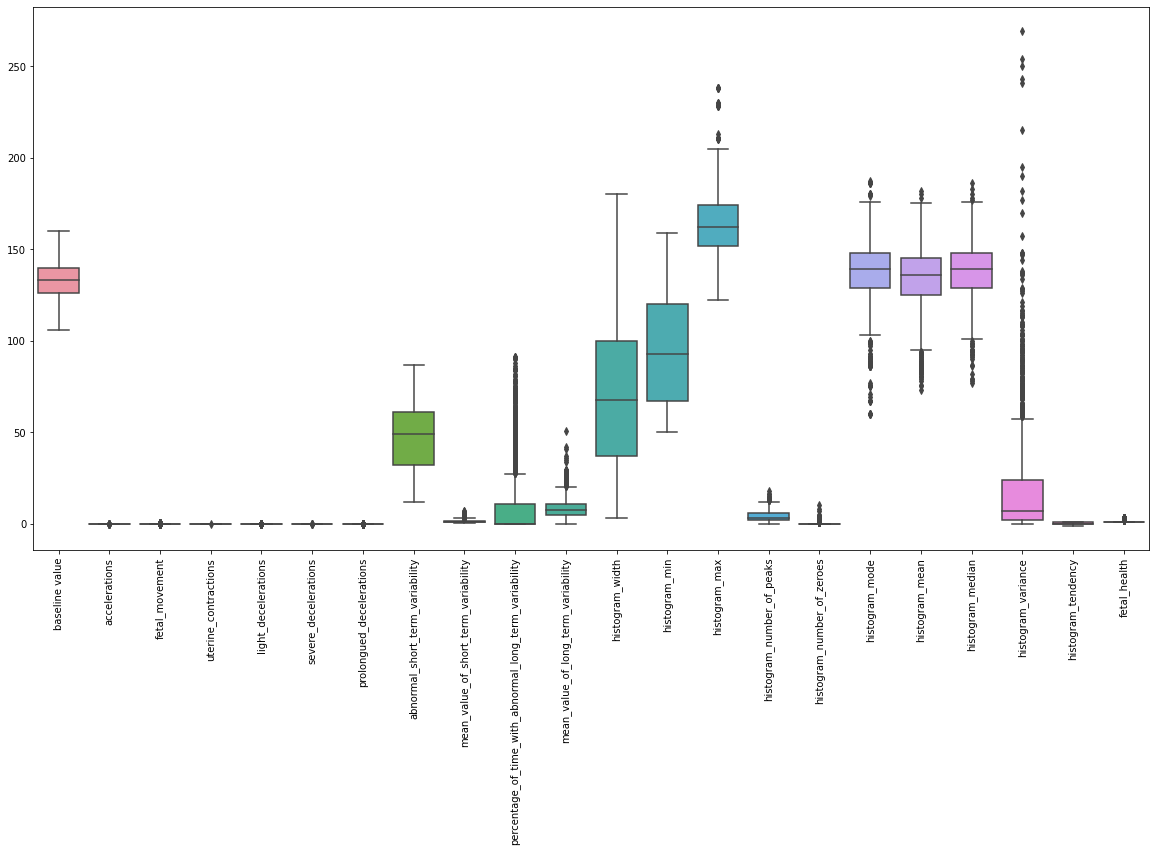

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
sns.boxplot(data=df)
plt.show()

From the boxplot we can observe outliers in several variables. It raises the questions whether these outliers should be removed, which might potentially result in overfitting. Since this dataset is about the fetal health and these outliers might be the indication of extreme health conditions, I have decided to keep these outliers. Besides, we only remove the outliers if it is potential data entry error and it is not too likely for the CTG report to have this type of error. 

This boxplot also shows that all the variables are in different range, meaning that they should be standardized before fitting the model.  

# Upsampling

**Class imbalance**

Previously we mentioned the class imbalance issue and now we will perform an upsampling to upsample the minority class: suspect and pathological. In order to compare the model performance with and without upsampling, we will run the experiment twice using decision tree. 

The result shows that the model is able to yield a higher accuracy as shown in the classification report after the upsampling. 



       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     4965.000000    4965.000000     4965.000000           4965.000000   
mean       135.084391       0.001547        0.013575              0.003666   
std         10.075937       0.002972        0.059262              0.003185   
min        106.000000       0.000000        0.000000              0.000000   
25%        128.000000       0.000000        0.000000              0.000000   
50%        134.000000       0.000000        0.000000              0.003000   
75%        143.000000       0.002000        0.003000              0.006000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          4965.000000           4965.000000               4965.000000   
mean              0.002091              0.000012                  0.000481   
std               0.003326              0.000109               

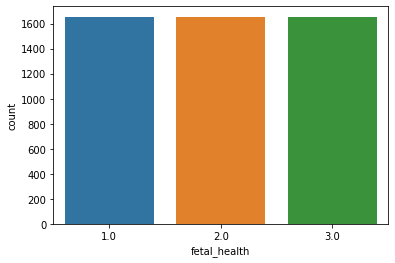

In [ ]:
from sklearn.utils import resample
 

df_majority = df[df.fetal_health==1.0]
df_minority = df[df.fetal_health==2.0]
df_minority_2 = df[df.fetal_health==3.0]
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=1655,    
                                 random_state=123) 
 

df_minority_upsampled_2 = resample(df_minority_2, 
                                 replace=True,     
                                 n_samples=1655,    
                                 random_state=123) 
 

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled, df_minority_upsampled_2])
 

# Show dataset statistics
print(df_upsampled.describe())
 
# Display new class counts
df_upsampled.fetal_health.value_counts()
 

df = df_upsampled
sns.countplot(x='fetal_health', data=df_upsampled)

# Define X and Y

In [ ]:
X = X1.loc[:, X1.columns.isin(['percentage_of_time_with_abnormal_long_term_variability','abnormal_short_term_variability', 'prolongued_decelerations'])]
#extract the target column.
y = X1["fetal_health"] 

print(X)
print(y)

      prolongued_decelerations  abnormal_short_term_variability  \
0                          0.0                             73.0   
1                          0.0                             17.0   
2                          0.0                             16.0   
3                          0.0                             16.0   
4                          0.0                             16.0   
...                        ...                              ...   
2121                       0.0                             79.0   
2122                       0.0                             78.0   
2123                       0.0                             79.0   
2124                       0.0                             78.0   
2125                       0.0                             74.0   

      percentage_of_time_with_abnormal_long_term_variability  
0                                                  43.0       
1                                                   0.0       
2     

# Train-test-split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1, stratify=y)

# Scaling pipeline

In [ ]:
pipe_dt=Pipeline([('scl',StandardScaler()),
                 ('pca',PCA(n_components=1))
                 ])

x_train = pipe_dt.fit_transform(X_train)
x_test = pipe_dt.fit_transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape)

(1488, 3) (1488,) (638, 3)


# Decision Tree

## Hyper-parameter Tuning

In [ ]:
# gridsearch to find the best parameters 
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [2, 3, 5, 10, 20, 25],
              'min_samples_leaf': [5, 10, 20, 50, 100],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_test)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


## Evaluation

### Classification report

In [ ]:
print(classification_report(y_test, best_estimator.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.93      0.94      0.93       497
         2.0       0.55      0.65      0.60        88
         3.0       0.74      0.47      0.57        53

    accuracy                           0.86       638
   macro avg       0.74      0.69      0.70       638
weighted avg       0.86      0.86      0.86       638



### Confusion matrix

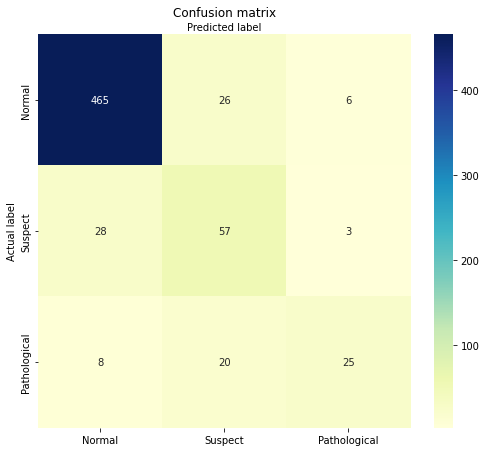

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cnf_matrix,
                     index = ['Normal', 'Suspect','Pathological'], 
                     columns = ['Normal', 'Suspect','Pathological'])

%matplotlib inline
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]

# Random forest 

In [ ]:
#extract the most important features from the feature selection

X = X1.loc[:, ~X1.columns.isin(['fetal_health'])]

#extract the target column
y = X1["fetal_health"] 

print(X)
print(y)

      baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1, stratify=y)

## Hyper-parameter Tuning

In [ ]:
# gridsearch to find the best parameters 
param_grid = {'max_depth': [5, 10, 20, 25],
              'min_samples_leaf': [10, 20, 50, 100],
              'criterion' :['gini', 'entropy']
             }
tree_clas = RandomForestClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1024),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25],
                         'min_samples_leaf': [10, 20, 50, 100]},
             verbose=True)

In [ ]:
best_estimator = grid_search.best_estimator_
best_estimator

RandomForestClassifier(max_depth=10, min_samples_leaf=10, random_state=1024)

In [ ]:
y_pred = best_estimator.predict(X_test)

## Evaluation

### Classification report

In [ ]:
print(classification_report(y_test, best_estimator.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.92      0.99      0.95       497
         2.0       0.78      0.56      0.65        88
         3.0       0.98      0.83      0.90        53

    accuracy                           0.91       638
   macro avg       0.89      0.79      0.83       638
weighted avg       0.91      0.91      0.91       638



### Confusion matrix

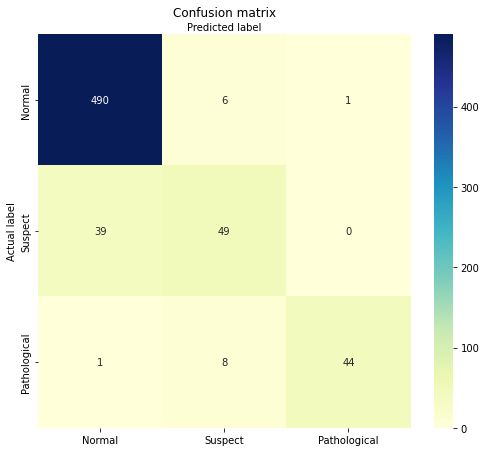

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cnf_matrix,
                     index = ['Normal', 'Suspect','Pathological'], 
                     columns = ['Normal', 'Suspect','Pathological'])

%matplotlib inline
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]

### The more trees the merrier?

https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial/notebook

In [ ]:
clf = RandomForestClassifier(n_estimators = 50, criterion='entropy', max_depth=20, min_samples_leaf=10,
                       random_state=1024)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, best_estimator.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.92      0.99      0.95       497
         2.0       0.78      0.56      0.65        88
         3.0       0.98      0.83      0.90        53

    accuracy                           0.91       638
   macro avg       0.89      0.79      0.83       638
weighted avg       0.91      0.91      0.91       638



In [ ]:
clf = RandomForestClassifier(n_estimators = 500, criterion='entropy', max_depth=20, min_samples_leaf=10,
                       random_state=1024)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, best_estimator.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.92      0.99      0.95       497
         2.0       0.78      0.56      0.65        88
         3.0       0.98      0.83      0.90        53

    accuracy                           0.91       638
   macro avg       0.89      0.79      0.83       638
weighted avg       0.91      0.91      0.91       638

